# **CS 6220 DATA MINING - ASSIGNMENT 4**

## Name: Jeremiah Asala
## Github: jerry-asala
## Email: asala.j@northeastern.edu

# K-Means

### Question 1a

In [54]:
# Bring in the dataset from the url

data_url = "https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt"

In [55]:
# Convert data from the link to pandas dataframe

import requests, pandas as pd

# get data from url
res = requests.get(data_url)
data = res.text

# split lines and convert to df
df = pd.DataFrame([line.split(",") for line in data.split("\n")])

# name columns
df.columns = ["timingSpeed", "coilGaps"]

# remove last row, which is null
df = df[:5000]

# cast to float data type
df = df.astype(float)

df.shape

(5000, 2)

In [56]:
# df as array
R = df.iloc[:, [0, 1]].values

R

array([[-11.96999577,  -8.03962819],
       [-26.96141582,  -6.96210943],
       [-12.91584891,  -1.37894148],
       ...,
       [ 12.92550271,  -0.10319682],
       [-34.33677838,   4.4057531 ],
       [-26.81273855,  -1.63995599]])

In [57]:
# Here are the starting centroids (initializations):

import numpy as np

init1 = np.array([10.0, 10.0])
init2 = np.array([-10.0, -10.0])
init3 = np.array([2.0, 2.0])
init4 = np.array([3.0, 3.0])
init5 = np.array([-3.0, -3.0])

In [58]:
# for all 5000 data points
# get distance of point(i) to each of 5 clusters
# get index of closest cluster to that point
# append pos of point(the data point) to the correct cluster array
# ...end up with clusters and the index of the data points closest to them

# for each cluster
# if len of cluster is > 0:
# sum all x-coord of data points in that cluster/len(cluster)
# ...and sum all y-coord of data points in that cluster/len(cluster)
# ......to get x, y of new centroid
# return centroids, clusters

In [59]:
# define funcs for calculating euc_distance and for k_means_clustering

import math

def get_euc_dist(a, b):
  return math.sqrt(((a[0] - b[0]) ** 2) + ((a[1] - b[1]) ** 2))

def k_means_clustering(data, k, iterations, starting_cents):
  
  # num of data points
  n = data.shape[0]

  # initial centroids
  centroids = np.array(starting_cents)

  for i in range(iterations):
    # new clusters
    clusters = [[] for _ in range(k)]

    # for all data points:
    for j in range(n):
      # list of k distances to each centroid
      dist = [get_euc_dist(data[j], centroid) for centroid in centroids]

      # get index of closest centroid to data[i]
      closest_cent = dist.index(min(dist))

      # append data[i] to appropriate cluster
      clusters[closest_cent].append(j)
    
    # Next, for each cluster, compute mean of all points
    for c in range(k):
      # if there is at least one point in the cluster
      if len(clusters[c]) > 0:
        centroids[c] = [sum(point[0] for point in data[clusters[c]]) / len(clusters[c]), sum(point[1] for point in data[clusters[c]]) / len(clusters[c])]


  return centroids, clusters

In [60]:
# define k, num of iterations, and starting centroids

k = 5
iterations = 100
starting_cents = [init1, init2, init3, init4, init5]

centroids, clusters = k_means_clustering(R, k, iterations, starting_cents)

print("These are the centroids:\n", centroids, "\n")
for i, cluster in enumerate(clusters):
  print("Cluster ", i+1, ": ", len(cluster), sep="")

These are the centroids:
 [[ 27.26677403  -1.08848482]
 [-32.27032272   2.65984149]
 [ -1.45401192  -2.23932918]
 [ 11.48737759  -1.70898344]
 [-15.05895772  -0.47281415]] 

Cluster 1: 636
Cluster 2: 585
Cluster 3: 1463
Cluster 4: 1222
Cluster 5: 1094


### Question 1b

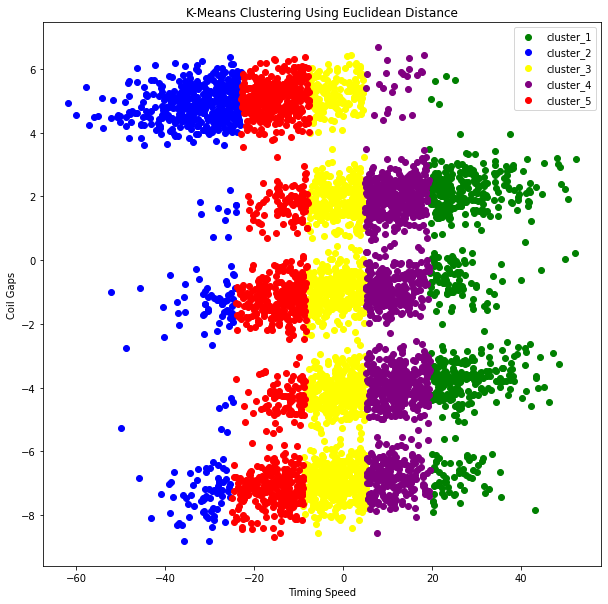

In [61]:
# Scatter results

import matplotlib.pyplot as plt

# colors and labels
c = ["green", "blue", "yellow", "purple", "red"]
l = ["cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]

# define figure size
plt.figure(figsize=(10.0, 10.0))

# scatter
for i, cluster in enumerate(clusters):
  plt.scatter(R[cluster, 0], R[cluster, 1], c = c[i], label = l[i])

# x and y labels
plt.title("K-Means Clustering Using Euclidean Distance")
plt.xlabel("Timing Speed")
plt.ylabel("Coil Gaps")
plt.legend()
plt.show()

### Question 1c

###### K = 5 is a logical choice for this dataset because the speed timing and coil gaps in the dataset are over 5 years (1996, 1999, 2006, 2015, 2022). It makes sense to initally try clustering around 5 points.

###### The data does not quite cluster well and using a different initialization might not make it cluster well. Changing the way we calculate the distance might make it cluster better.

### Question 2a

###### K = 5 is a logical choice for this dataset because the speed timing and coil gaps

In [62]:
# With info from Question 1, recompute using Mahalanobis distance
# Use P, and pre-compute P_inv

import numpy as np
from scipy.spatial import distance

# func to compute Mahalanobis distance
def get_mahala_dist(x, y, P_inv):
  return distance.mahalanobis(x, y, P_inv)

# func to compute k-means using mahalanobis distance
def k_means_mahalanobis(data, k, iterations, starting_cents, P_inv):

  # num of data points
  n = data.shape[0]

  # initial centroids
  centroids = np.array(starting_cents)

  for i in range(iterations):
    # new clusters
    clusters = [[] for _ in range(k)]

    # for all data points:
    for j in range(n):
      # list of k distances to each centroid
      dist = [get_mahala_dist(data[j], centroid, P_inv) for centroid in centroids]

      # get index of closest centroid to data[i]
      closest_cent = dist.index(min(dist))

      # append data[i] to appropriate cluster
      clusters[closest_cent].append(j)
    
    # Next, for each cluster, compute mean of all points
    for c in range(k):
      # if there is at least one point in the cluster
      if len(clusters[c]) > 0:
        centroids[c] = [sum(point[0] for point in data[clusters[c]]) / len(clusters[c]), sum(point[1] for point in data[clusters[c]]) / len(clusters[c])]


  return centroids, clusters

In [63]:
# define k, num of iterations, starting centroids, and P_inverse

k = 5
iterations = 100
starting_cents = [init1, init2, init3, init4, init5]
P = np.array([[10.0, 0.5], [-10.0, 0.25]])

# pre-compute P'
P_cov = np.dot(P.T, P)
P_inv = np.linalg.inv(P_cov)

centroids, clusters = k_means_mahalanobis(R, k, iterations, starting_cents, P_inv)

print("These are the centroids:\n", centroids, "\n")
for i, cluster in enumerate(clusters):
  print("Cluster ", i+1, ": ", len(cluster), sep="")

These are the centroids:
 [[-20.40310599   5.00655283]
 [ -3.24764066  -7.01766444]
 [ -1.09670369  -0.9992032 ]
 [  9.97451285   2.00207148]
 [  8.71408722  -4.00981947]] 

Cluster 1: 1000
Cluster 2: 1000
Cluster 3: 1004
Cluster 4: 998
Cluster 5: 998


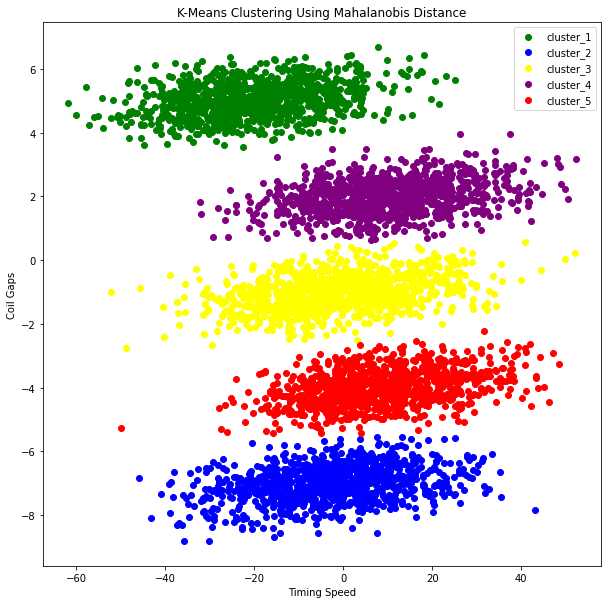

In [64]:
# Scatter results

import matplotlib.pyplot as plt

# colors and labels
c = ["green", "blue", "yellow", "purple", "red"]
l = ["cluster_1", "cluster_2", "cluster_3", "cluster_4", "cluster_5"]

# define figure size
plt.figure(figsize=(10.0, 10.0))

# scatter
for i, cluster in enumerate(clusters):
  plt.scatter(R[cluster, 0], R[cluster, 1], c = c[i], label = l[i])

# x and y labels
plt.title("K-Means Clustering Using Mahalanobis Distance")
plt.xlabel("Timing Speed")
plt.ylabel("Coil Gaps")
plt.legend()
plt.show()

### Question 2b

In [65]:
# PC of aggregate data using Sklearn library
# The more detailed, "manual" approach involves normalizing, getting cov matrix,
# ...getting eigenvec and vals, sorting in decreasing order of eigenvals, selecting
# ......top n componenents

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(R)

print("Aggregate data")

for i, comp in enumerate(pca.components_):
  print(f"Component {i+1}:", comp)

Aggregate data
Component 1: [-0.99838317  0.05684225]
Component 2: [-0.05684225 -0.99838317]


### Question 2c

###### **The clusters are similar to each other, but not similar to the aggregate data**

In [66]:
# calculate and print out PC for each cluster
for i, cluster in enumerate(clusters):
  if len(cluster) > 0:
    pca = PCA()
    pca.fit(R[cluster])
    #print(pca.explained_variance_ratio_)
    print("Cluster", i+1)
    for i, comp in enumerate(pca.components_):
      print(f"Component {i+1}:", comp)
    print("\n")

Cluster 1
Component 1: [0.99993527 0.01137789]
Component 2: [ 0.01137789 -0.99993527]


Cluster 2
Component 1: [0.99992533 0.01222027]
Component 2: [ 0.01222027 -0.99992533]


Cluster 3
Component 1: [0.99990986 0.01342629]
Component 2: [ 0.01342629 -0.99990986]


Cluster 4
Component 1: [0.99993306 0.01157047]
Component 2: [-0.01157047  0.99993306]


Cluster 5
Component 1: [-0.99989374 -0.01457781]
Component 2: [-0.01457781  0.99989374]




### Question 2d

###### **Relationship between the P' and the data: P' is a linear transformation of the data matrix, P, that captures the principal components of the data.**

In [67]:
# compute P'

# extract eigens of P
eig_val, eig_vec = np.linalg.eig(np.dot(P.T, P))

eigval_diag = np.diag(eig_val)

P_prime = np.dot(eigval_diag, eig_vec)

print("Eigenval of P:", eig_val)
print("Eigenvec of P:", eig_vec)

print("P':", P_prime)

Eigenval of P: [200.031294   0.281206]
Eigenvec of P: [[ 0.99992166 -0.01251662]
 [ 0.01251662  0.99992166]]
P': [[ 2.00015624e+02 -2.50371560e+00]
 [ 3.51974851e-03  2.81183971e-01]]


# Maket Basket Analysis and Algorithms

### Question 3a

In [68]:
# Generate all candidate itemsets using F(k-1) X F(1) merging strategy
# ...combine frequent itemset of size k-1 with all of size-1 to form k

from itertools import combinations


freq_3_itemset = [{1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 3, 4}, {2, 3, 4}, {2, 3, 5}, {3, 4, 5}]

data_set = [{1}, {2}, {3}, {4}, {5}]

# get 4-itemsets by doing a union
merged = [(s1.union(s2)) for s1 in freq_3_itemset for s2 in data_set if len(s1.union(s2)) == 4]

# get all combinations
candidates = [s for s in combinations(set().union(*merged), 4)]

candidates

[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5)]

### Question 3b

In [69]:
# Generate all candidate itemsets using F(k-1) X F(k-1) A Priori strategy
# ...merge pairs of frequent itemsets of k-1 if their first k-2 elements are identical

# Approach: get k from k-1 X k-1 merge

def get_candidates(itemset):
  candidates = set()

  # iterate through k-1 sets and form unions that make k sets if first k-2 items are the same
  for set1 in itemset:
    for set2 in itemset:

      # don't compare the same itemset
      if set1 == set2:
        continue
      list_set1 = list(set1)
      list_set2 = list(set2)
      
      # compare first k-2 items
      if list_set1[0] == list_set2[0] and list_set1[1] == list_set2[1]:
        if len(set1.union(set2)) == 4:
          candidates.add(tuple(set1.union(set2)))

  return candidates


a_priori_candidates = get_candidates(freq_3_itemset)

a_priori_candidates

{(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (2, 3, 4, 5)}

### Question 3c

In [70]:
# List all candidates 4-itemset that survive pruning of Question 3c

def get_next_freq_itemset(prev_freq_itemset):

  freq_4_itemset = set()

  # get all k-1 subsets
  for can_set in a_priori_candidates:
    is_freq_4_itemset = True
    can_subsets = list(combinations(can_set, 3))

    # check if each subset is in freq_3_itemset
    for subset in can_subsets:
      if set(subset) not in freq_3_itemset:
        is_freq_4_itemset = False
        break

    # it is a freq-4 itemset if all k-1 subsets in freq-3 itemset
    if is_freq_4_itemset:
      freq_4_itemset.add(can_set)

  return freq_4_itemset

freq_4_itemset = get_next_freq_itemset(freq_3_itemset)

freq_4_itemset

{(1, 2, 3, 4)}

### Question 4a

###### The cardinality of the itemset, n, is 7. Therefore, the total number of rules that can be extracted from the set is 3^n - 2^n + 1 = (3)^7 - (2)^8 + 1 = 1932

### Question 4b

The confidence of a rule, {A} -> {B} is the ratio of the support of the set {A, B} to the support of the set {A}. In other words, it is the percentage of transactions that contain {A} and also contain {B}.

Support of {Milk, Diapers, Butter} = 2
Support of {Milk, DIapers} = 4

Therefore, confidence of {Milk, Diapers} -> {Butter} = 0.50 (or 50%).

### Question 4c

###### The support for a rule {X} -> {Y} is the number of transactions that contain the (X U Y) over the total number of transactions. Therefore, the support for the rule {Milk, Diapers} -> {Butter} is **2/10 = 0.2 (20%)**, since there are two transaction (#2 and #7) that contain "Milk", "Diapers", and "Butter"

### Question 4d

#### TRUE

###### This is true because for some frequent itemset X, all subsets of X are also frequent itemsets. Since {a, b, c, d} is a frequent itemset, all subsets of the set (which includes the set {a, b}) are also frequent itemsets.

### Question 4e

#### TRUE

###### This is true because using the A Priori method of merging (k-1) frequent itemsets to obtain k-itemsets, a k-itemset is a frequent itemset if every k-1 subset of the itemset is in the k-1 frequent itemsets.

###### In this case, the 2-subsets of {a, b, c} are {a, b}, {a, c}, and {b, c}. Since all those subsets can be found in the original frequent itemsets, the set {a, b, c} is always frequent **(assuming the set {a, b, c} is in the dataset)**.

### Question 4f

#### FALSE

###### In the A Priori Principle, the support of an itemset is never greater than the support of its subsets (anti-monotone property). In the set {a, b} with support 20, the support of {b} is at least 20. I the set {b, c} with support 30, the support of {b} is at least 30. Therefore, it is not true that the support of {b} is between 20 and 30 (non-inclusive) because in the latter case, the support of {b} is at least 30.

### Question 4g

#### FALSE

###### Given 5 items in the dataset, the maximum number of size-2 itemsets that can be extracted is number of ways we can choose 2 items from a set of 5 where the order does not matter. This is combination(5, 2). After picking the first item, there are 4 choices left for the second item. Hence, there are (5 x 4) size-2 itemsets, but since order does not matter in a set, there are ((5 x 4)/2) size-2 itemsets (since {b, c} and {c, b} are the same size-2 itemset). Therefore, the maximum number of size-2 itemsets that can be extracted is 10.

### Question 4h

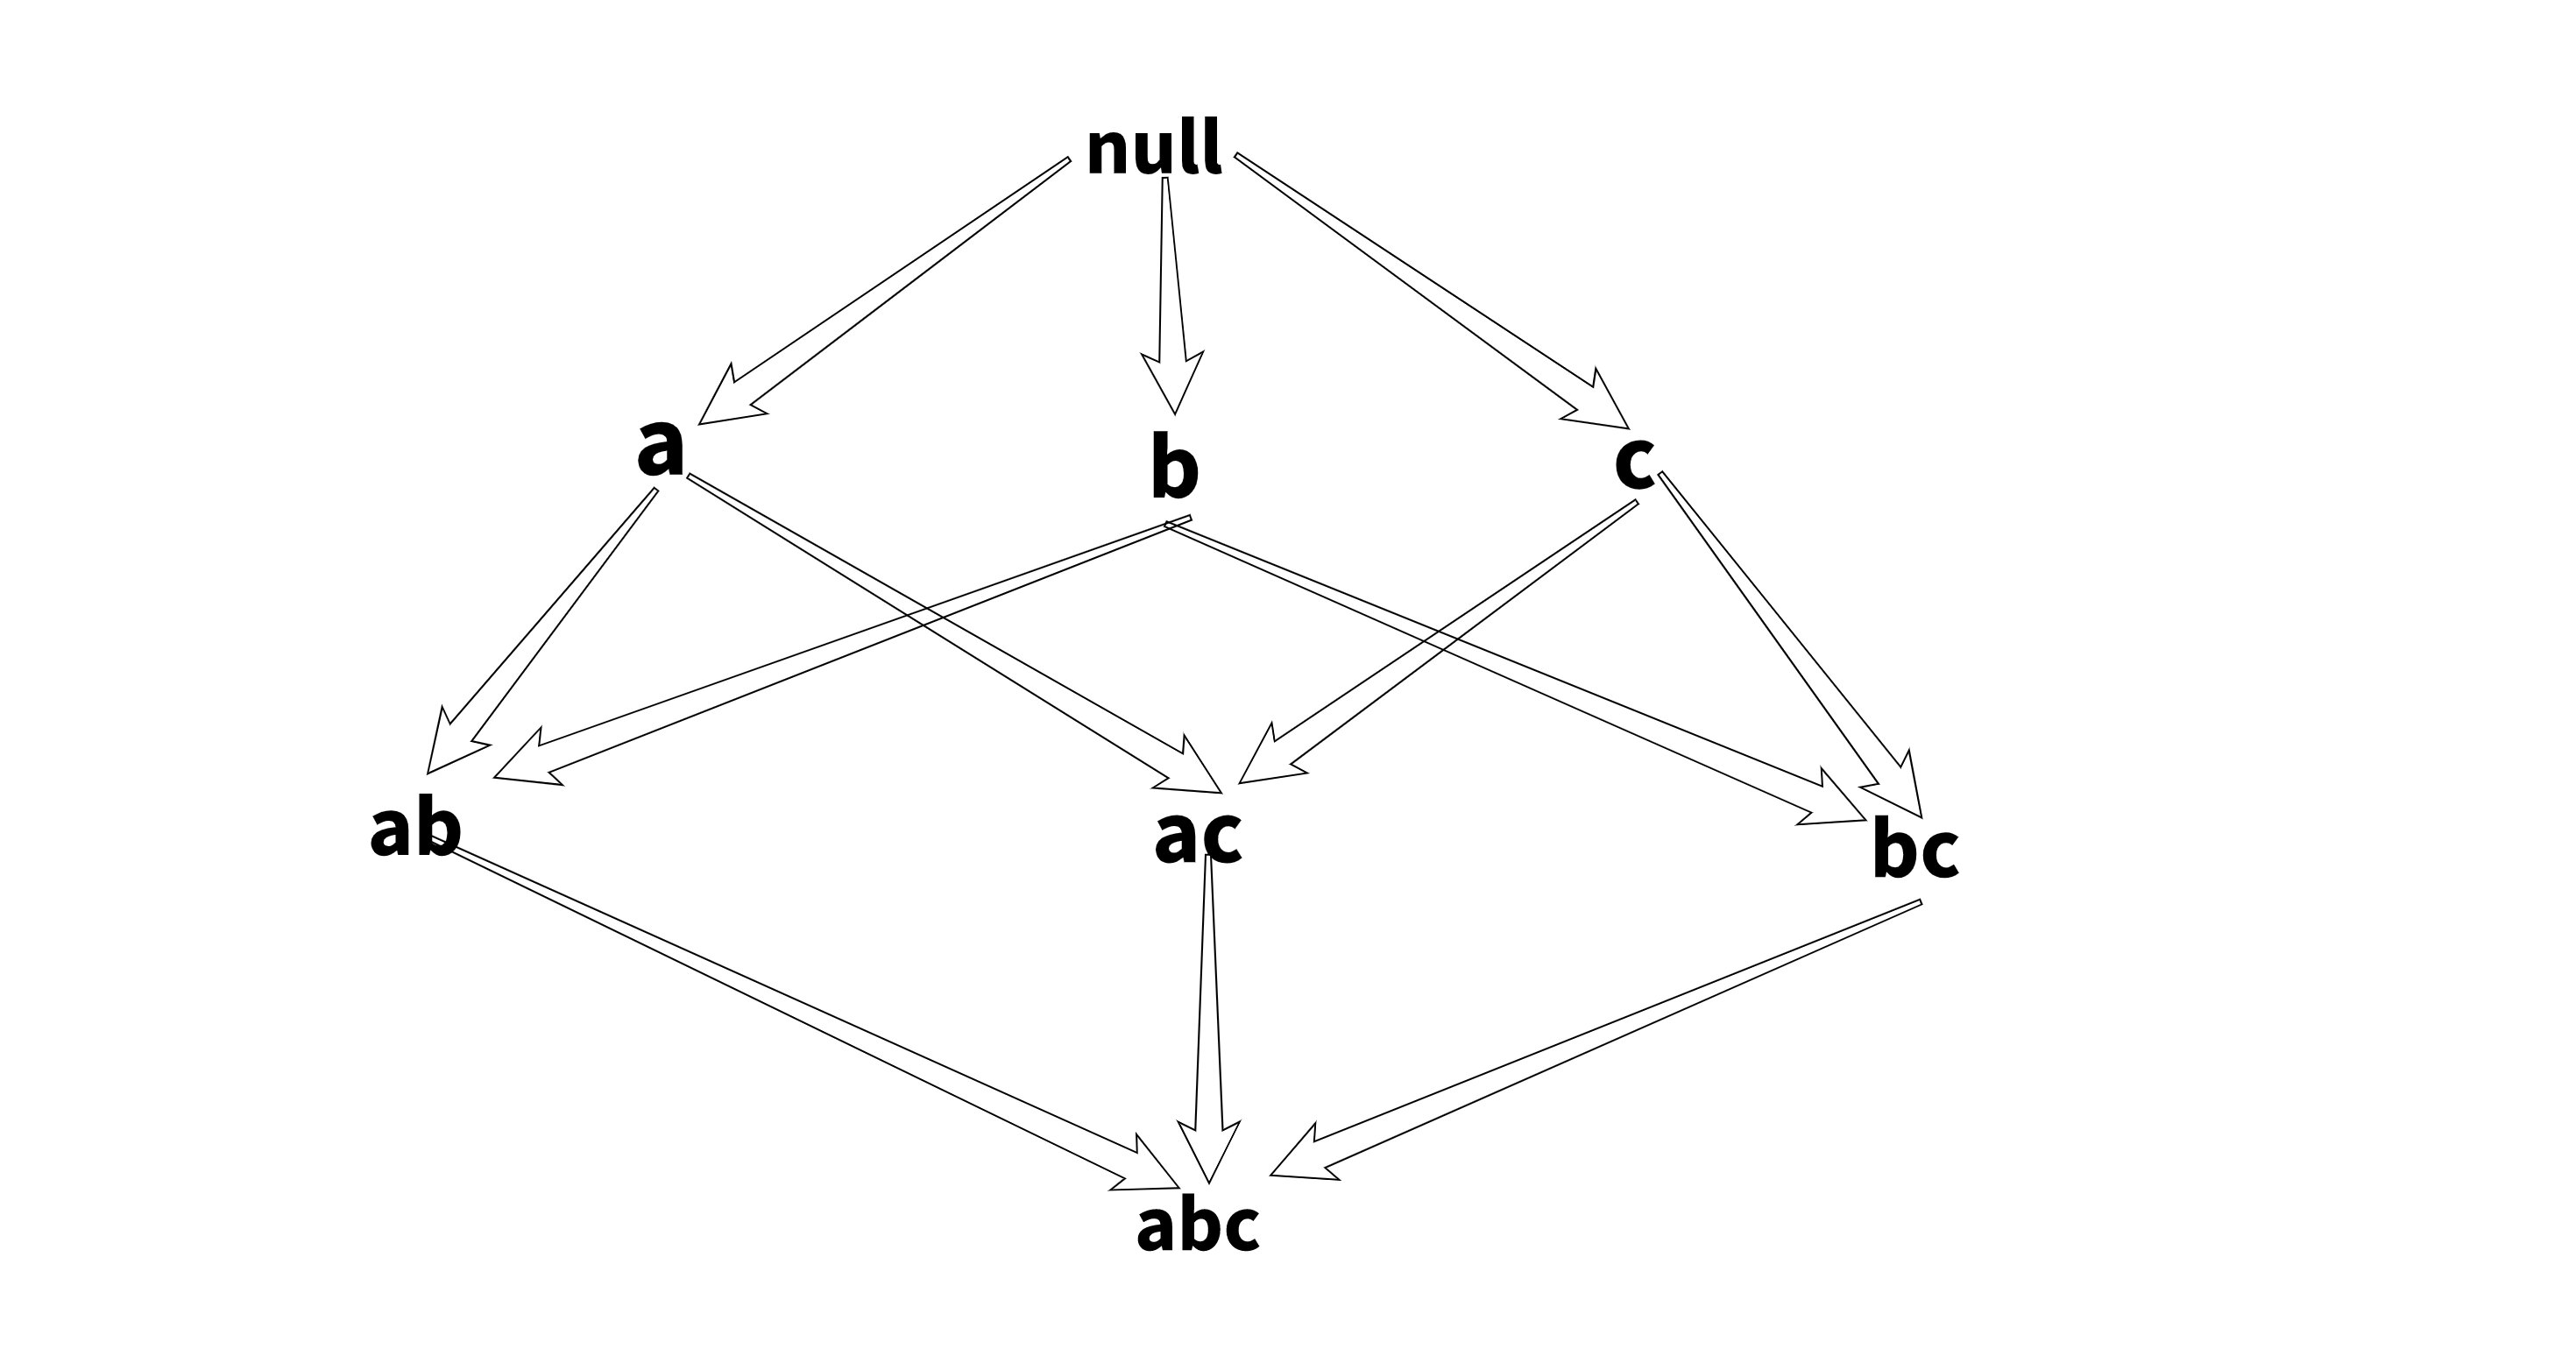